In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from os import listdir


In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Data.zip", 'r')
zip_ref.extractall("data")

Mounted at /content/drive/


In [3]:
boxscore_path='/content/data/Data/Boxscore Data/'
player_path='/content/data/Data/Player Data/'

In [4]:
class Team:
    def __init__(self,team,season,pts,fga,fgp,threePA,threePP,fta,ftp,oreb,dreb,ast,stl,blk,tov,pf,plusminus):
        self.team=team
        self.season=season
        self.pts=pts
        self.fga=fga
        self.fgp=float(fgp)
        self.threePA=threePA
        self.threePP=float(threePP)
        self.fta=fta
        self.ftp=float(ftp)
        self.oreb=oreb
        self.dreb=dreb
        self.ast=ast
        self.stl=stl
        self.blk=blk
        self.tov=tov
        self.pf=pf
        self.plusminus=plusminus
        self.gamesplayed=1
        self.playoff=0
    def updatePts(self,amt):
        self.pts+=amt
    def updateFga(self,amt):
        self.fga+=amt
    def updateFgp(self,amt):
        self.fgp+=float(amt)
    def updateThreePA(self,amt):
        self.threePA+=amt
    def updateThreePP(self,amt):
        self.threePP+=float(amt)
    def updateFta(self,amt):
        self.fta+=amt
    def updateFtp(self,amt):
        self.ftp+=float(amt)
    def updateOreb(self,amt):
        self.oreb+=amt
    def updateDreb(self,amt):
        self.dreb+=amt
    def updateAst(self,amt):
        self.ast+=amt
    def updateStl(self,amt):
        self.stl+=amt
    def updateBlk(self,amt):
        self.blk+=amt
    def updateTov(self,amt):
        self.tov+=amt
    def updatePf(self,amt):
        self.pf+=amt
    def updatePlusminus(self,amt):
        self.plusminus+=amt
    def updateGamesplayed(self):
        self.gamesplayed+=1
    def updatePlayoff(self):
        self.playoff=1
    def getAverage(self):
        self.pts/=self.gamesplayed
        self.fga/=self.gamesplayed
        self.fgp/=self.gamesplayed
        self.threePA/=self.gamesplayed
        self.threePP/=self.gamesplayed
        self.fta/=self.gamesplayed
        self.ftp/=self.gamesplayed
        self.oreb/=self.gamesplayed
        self.dreb/=self.gamesplayed
        self.ast/=self.gamesplayed
        self.stl/=self.gamesplayed
        self.blk/=self.gamesplayed
        self.tov/=self.gamesplayed
        self.pf/=self.gamesplayed
    
        

In [5]:
#{teamname + season name: team}
team_dict={}
def interpret(season, game):
    teamName=game['Team']
    key=str(teamName)+season
    #if team already exists
    if key in team_dict:
        team_dict[key].updatePts(game['PTS'])
        team_dict[key].updateFga(game['FGA'])
        if(game['FG%']=='-'):
            team_dict[key].updateFgp(0)
        else:
            team_dict[key].updateFgp(game['FG%'])
        team_dict[key].updateThreePA(game['3PA'])
        if(game['3P%']=='-'):
            team_dict[key].updateThreePP(0)
        else:
            team_dict[key].updateThreePP(game['3P%'])
        team_dict[key].updateFta(game['FTA'])
        if(game['FT%']=='-'):
            team_dict[key].updateFtp(0)
        else:
            team_dict[key].updateFtp(game['FT%'])
        team_dict[key].updateOreb(game['OREB'])
        team_dict[key].updateDreb(game['DREB'])
        team_dict[key].updateAst(game['AST'])
        team_dict[key].updateStl(game['STL'])
        team_dict[key].updateBlk(game['BLK'])
        team_dict[key].updateTov(game['TOV'])
        team_dict[key].updatePf(game['PF'])
        team_dict[key].updatePlusminus(game['#ERROR!'])
        team_dict[key].updateGamesplayed()
    #team does not already exist
    else:
        team=Team(teamName,season,game['PTS'],game['FGA'],game['FG%'],game['3PA'],game['3P%'],game['FTA'],
            game['FT%'],game['OREB'],game['DREB'],game['AST'],game['STL'],game['BLK'],game['TOV'],game['PF'],game['#ERROR!'])
        team_dict[key]=team
def interpretPlayoff(season,game):
    #as in, indicate team did in fact make the playoffs
    teamName=game['Team']
    key=str(teamName)+season
    team_dict[key].updatePlayoff()

In [6]:
import os
import pandas as pd
boxscores=[]
#get boxscores
for f in os.listdir(boxscore_path):
    if f.lower().endswith('.csv'):
        #print(os.path.splitext(f))
        boxscores.append([f,pd.read_csv(boxscore_path+f,delimiter=',')])
#season   team   [data]   playoffs?
for boxscore in boxscores:
    if os.path.splitext(boxscore[0])[0].split()[-1] == 'Reg': #if regular season
        #holds season year
        season=os.path.splitext(boxscore[0])[0].split()[3]
        #get rid of unneeded columns
        del boxscore[1]['W/L']
        del boxscore[1]['Game Date']
        del boxscore[1]['MIN']
        del boxscore[1]['Match Up']
        del boxscore[1]['3:00 PM']
        del boxscore[1]['FTM']
        del boxscore[1]['FGM']
        del boxscore[1]['REB']
        #for each game in the regular season
        for game in boxscore[1].iterrows():
            game=game[1]
            #convert to dict for easier interpretation
            interpret(season,game.to_dict())

#check if team made it into playoffs
for boxscore in boxscores:
    if os.path.splitext(boxscore[0])[0].split()[-1] == 'Playoff': #if regular season
        #holds season year
        season=os.path.splitext(boxscore[0])[0].split()[3]
        #for each game in the playoff season
        for game in boxscore[1].iterrows():
            game=game[1]
            #convert to dict for easier interpretation
            interpretPlayoff(season,game.to_dict())

In [7]:
#season: [list of teams]
season_dict={}
for team in team_dict:
    team_dict[team].getAverage()
    key=team[-5:]
    #if this season already exists
    if key in season_dict:
        season_dict[key].append(team_dict[team])
    #if season doesn't already exist
    else:
        season_dict[key]=[team_dict[team]]


In [8]:
import pandas
#convert dictionaries to usable dataframes
#holds all season dataframes
#{'Team': 'SEA', 'W/L': 'W', 'PTS': 109, 'FGA': 79, 'FG%': 45.6, '3PA': 26, '3P%': 46.2, 'FTA': 27, 'FT%': 92.6, 'OREB': 3,
#'DREB': 27, 'AST': 23, 'STL': 13, 'BLK': 7, 'TOV': 16, 'PF': 17, '#ERROR!': 11}
df = pandas.DataFrame()
df=pd.DataFrame(columns=['Playoff','PTS','FGA','FG%','3PA','3P%','FTA','FT%','OREB','DREB','AST','STL','BLK',
                            'TOV','PF','+/-'])
seasons = [ ]
for season in season_dict:
    seasons.append(season) 
seasons = sorted(seasons)
i = 0
for season in season_dict:
    for team in season_dict[seasons[i]]:
        df=df.append({'Playoff':team.playoff,'PTS':team.pts,'FGA':team.fga,'FG%':team.fgp,'3PA':team.threePA,'3P%':team.threePP,
                   'FTA':team.fta,'FT%':team.ftp,'OREB':team.oreb,'DREB':team.dreb,'AST':team.ast,'STL':team.stl,
                   'BLK':team.blk,'TOV':team.tov,'PF':team.pf,'+/-':team.plusminus},ignore_index=True)
    i=i+1

In [9]:
from google.colab import files
df.to_csv('output.csv') 

In [10]:
df = df.dropna(axis=0)
df.isna().any()

Playoff    False
PTS        False
FGA        False
FG%        False
3PA        False
3P%        False
FTA        False
FT%        False
OREB       False
DREB       False
AST        False
STL        False
BLK        False
TOV        False
PF         False
+/-        False
dtype: bool

In [11]:
# Binary classification 
import tensorflow as tf
from keras.engine.training import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,BatchNormalization,Activation,Conv2D,MaxPool2D

from sklearn.preprocessing import MinMaxScaler as StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df.astype(float))
# dfScaled = scaler.transform(df)
Y = df[:688,:1]
X = df[:688,2:]
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
history = model.fit(X,Y,epochs=15,batch_size=64,validation_split=0.1)

Epoch 1/15
10/10 [==============================] - 1s 26ms/step - loss: 0.7779 - accuracy: 0.5267 - val_loss: 0.6556 - val_accuracy: 0.8841
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 0.6684 - accuracy: 0.6532 - val_loss: 0.6825 - val_accuracy: 0.6522
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.5840 - accuracy: 0.6872 - val_loss: 0.7037 - val_accuracy: 0.3333
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.5061 - accuracy: 0.7618 - val_loss: 0.7191 - val_accuracy: 0.3188
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.4839 - accuracy: 0.7439 - val_loss: 0.7290 - val_accuracy: 0.3333
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 0.4499 - accuracy: 0.7780 - val_loss: 0.7292 - val_accuracy: 0.3623
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 0.4498 - accuracy: 0.7861 - val_loss: 0.7362 - val_accuracy: 0.4058
Epoch 8/15
10/10 [=

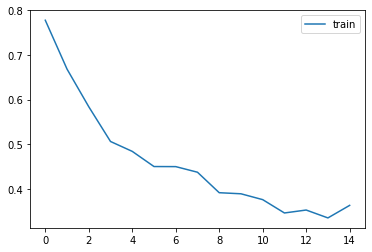

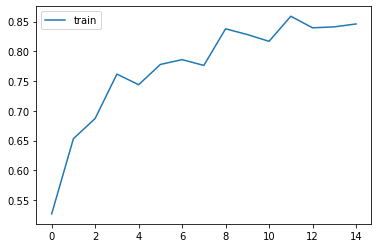

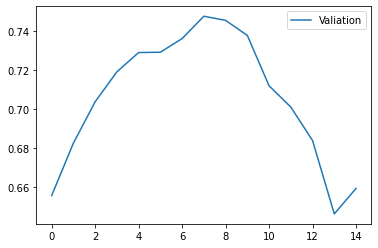

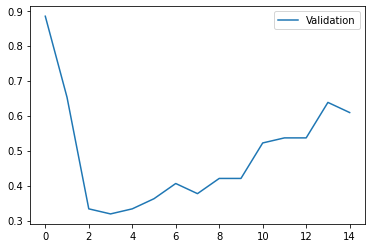

In [76]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_loss'], label='Valiation')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [15]:
df = df[:688]

In [16]:
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler as StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df.astype(float))
dfScaled = scaler.transform(df)
trainX = []
trainY = []
n_future = 1
n_past = 14
df
for i in range(n_past,len(dfScaled)-n_future +1):
  trainX.append(dfScaled[i - n_past:i,0:dfScaled.shape[1]])
  trainY.append(dfScaled[i+n_future-1:i+n_future,0])
trainX, trainY = np.array(trainX),np.array(trainY)
print(trainX.shape)
print(trainY.shape)

(672, 14, 16)
(672, 1)


In [127]:
import numpy
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout,Flatten,BatchNormalization,Activation,Conv2D,MaxPool2D
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler
import tensorflow
scaler =  MinMaxScaler()
Y = df[:500,:1]
X = df[:500,2:]
YVal = df[500:,:1]
XVal = df[500:,2:]
scaler = scaler.fit(X.astype(float))
scaled = scaler.transform(X)
scaler = scaler.fit(Y.astype(float))
Yscaled = scaler.fit_transform(Y)
scaler = scaler.fit(XVal.astype(float))
XValScaled = scaler.transform(XVal)
scaler = scaler.fit(YVal.astype(float))
YValscaled = scaler.fit_transform(YVal)
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled,Yscaled,length=40,sampling_rate=10,batch_size=32)
Val_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(XValScaled,YValscaled,length=40,sampling_rate=10,batch_size=32)
model = Sequential()
model.add(LSTM(64,input_shape=(40,X.shape[1]),return_sequences=False))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
optimizer = tensorflow.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [128]:
history = model.fit(train_generator,epochs=300,steps_per_epoch=10,validation_data=Val_generator)

Epoch 1/300
10/10 [==============================] - 2s 48ms/step - loss: 0.2483 - acc: 0.5344 - val_loss: 0.2708 - val_acc: 0.3151
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2467 - acc: 0.5500 - val_loss: 0.2752 - val_acc: 0.3151
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2471 - acc: 0.5467 - val_loss: 0.2592 - val_acc: 0.3219
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.2482 - acc: 0.5400 - val_loss: 0.2545 - val_acc: 0.3836
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2463 - acc: 0.5594 - val_loss: 0.2703 - val_acc: 0.3151
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2463 - acc: 0.5533 - val_loss: 0.2723 - val_acc: 0.3151
Epoch 7/300
10/10 [==============================] - 0s 8ms/step - loss: 0.2459 - acc: 0.5469 - val_loss: 0.2637 - val_acc: 0.3151
Epoch 8/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2468 - 

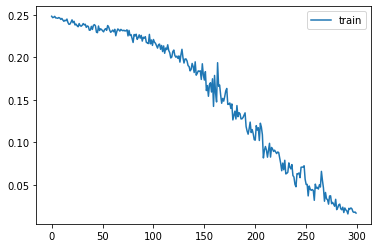

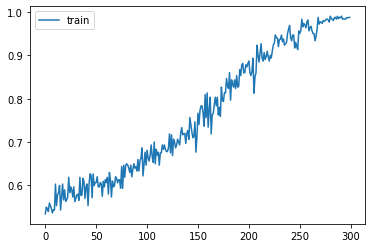

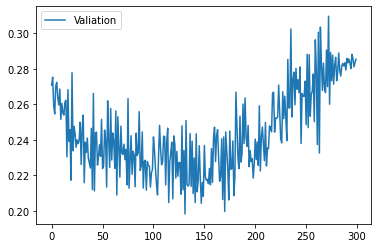

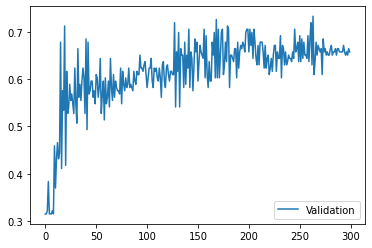

In [129]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['acc'], label='train')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_loss'], label='Valiation')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_acc'], label='Validation')
pyplot.legend()
pyplot.show()

In [20]:
x_train, y_train = X[:500,],Y[:500,]
x_test, y_test = X[500:,],Y[500:,]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
n_classes = 2
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [19]:
from tensorflow import keras
from keras import layers
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [22]:
input_shape = x_train.shape[1:]
head_size=256
num_heads=4
ff_dim=4
num_transformer_blocks=4
mlp_units=[128]
mlp_dropout=0.4
dropout=0.2
inputs = keras.Input(shape=input_shape)
x = inputs
for i in range(num_transformer_blocks):
  x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
for dim in mlp_units:
  x = layers.Dense(dim, activation="relu")(x)
  x = layers.Dropout(mlp_dropout)(x)
outputs = layers.Dense(n_classes, activation="softmax")(x)
model =  keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 layer_normalization_40 (LayerN  (None, 14, 1)       2           ['input_6[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_20 (Multi  (None, 14, 1)       7169        ['layer_normalization_40[0][0]', 
 HeadAttention)                                                   'layer_normalization_40[0][0]'] 
                                                                                            

[0.7316078543663025, 0.7419354915618896]

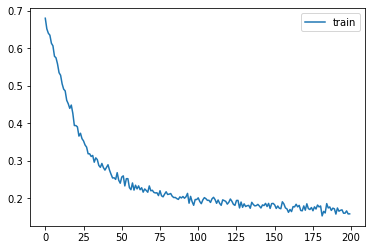

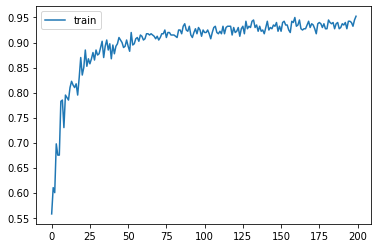

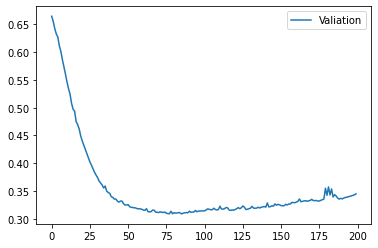

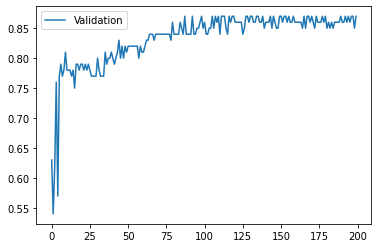

In [23]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['acc'], label='train')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_loss'], label='Valiation')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['val_acc'], label='Validation')
pyplot.legend()
pyplot.show()